<a href="https://colab.research.google.com/github/jcv00036/amn_p/blob/main/Handout_3_Juan_Carrasco_Vico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>ANALYSIS AND NUMERICAL METHODS - HANDOUT 3</b></h1>
   

*   Name: Juan Carrasco Vico
*   At: EPSJ - University of Jaén
*   email: <a href="mailto:jcv00036@red.ujaen.es">jcv00036@red.ujaen.es</a>
*   Link to this file in GitHub: <a href= https://github.com/jcv00036/amn_p/blob/main/Handout_3_Juan_Carrasco_Vico.ipynb>[link]</a> (visualization could be easier)

In [1]:
#Import all the libraries we can use:
import math
import numpy as np
import matplotlib.pyplot as plt

#**Implementation of mathematical methods**

## 1.Plot the sequence {xn} with 1 ≤ n ≤ 50 for:

In [2]:
def x(n,r): #my sequence
  if n==1: return 0.5
  return r*x(n-1,r)

#Extrems of my interval
a = 1
b = 4

### a)r=2.5

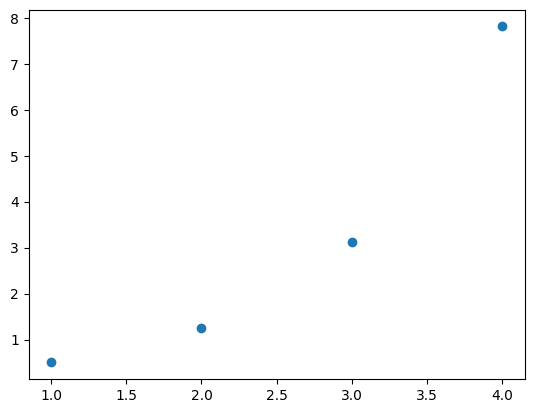

In [3]:
r = 2.5
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

### b)r=3.5

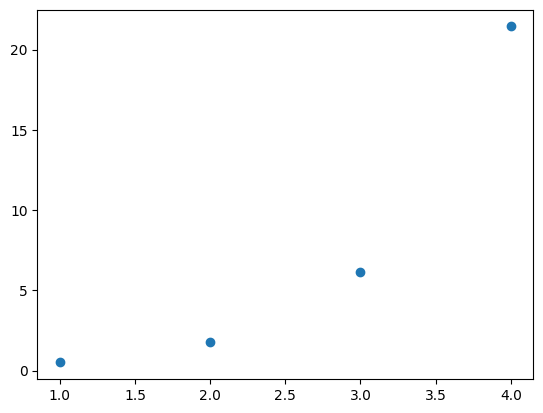

In [4]:
r = 3.5
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

### c)r=3.55

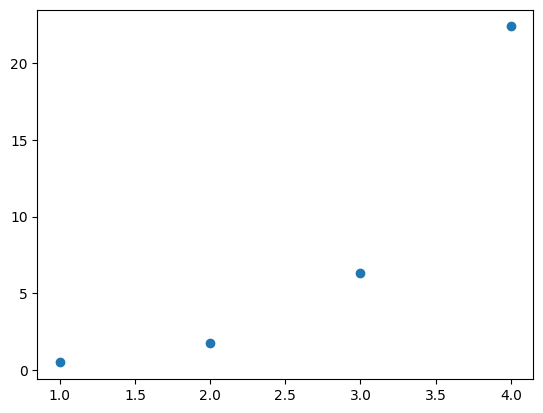

In [5]:
r = 3.55
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

### d)r=1 + √8

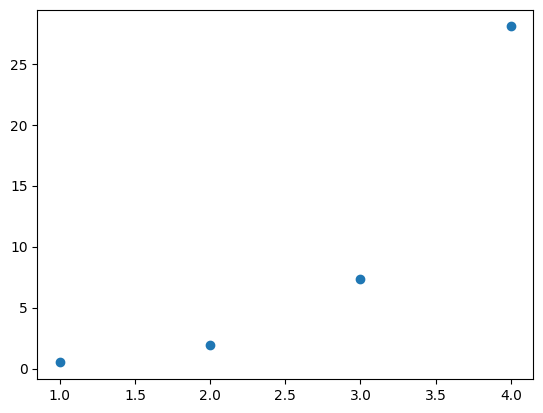

In [6]:
r = 1+ math.sqrt(8)
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

## 2.Write a function remainderPol(P,Q) whose input are two polynomials P and Q that returns the remainder of the division of P and Q.


In [7]:
def multiplyPol(P,Q):
  """
  Parameters
    ----------
    P,Q: array
        Two arrays that represent two polynomials
    Returns
    -------
    product: array
        The product of P(x) and Q(x)
  """
  product = [0 for i in range(len(P)+len(Q)-1)]
  for i in range(0,len(P)):
    for j in range(0,len(Q)):
      product[i+j] += P[i]*Q[j]
  return product;

def remainderPol(P,Q):
  """
  Parameters
    ----------
    P,Q: array
        Two arrays that represent two polynomials
    Returns
    -------
    remainder: array
        The remainder of the division P(x)/Q(x)
  """
  if len(Q) == 0: #If Q is 0, the division cannot take place and so the remainder is NaN
    return "Nan"
  elif len(Q)>len(P): #If Q's degree is bigger than P's, the quotient is 0 and remainder is Q
    return Q
  else:
    #P(x)/Q(x) is calculated like so: Divide the leading terms, and multyply Q by the quotient, the substraction of P(x) and Q(x)*Quotient(x) = Remainder(x)
    #This goes on and on until Quotient(x)'s degree < Q(x)'s
    quotient = [0 for i in range(len(P)-len(Q)+1)]
    quotient[len(P)-len(Q)] = P[len(P)-1]//Q[len(Q)-1]
    remainder = [0 for i in range(len(P))];
    for i in range(len(P)):
      remainder[i] = P[i]-multiplyPol(Q,quotient)[i]
    del remainder[len(P)-1]
    while len(remainder) >= len(Q):
      remainder = remainderPol(remainder,Q)
  return remainder

def printPol(P):
  """Prints a polynomial

  Parameters
  ----------
    P: array
        Array that represent a polynomial
  """
  printed = False
  for i in range(len(P)-1,-1,-1):
    if(P[i]!=0):
      if(i!=len(P)-1 and printed):  print( "+ " ,end='')
      print(P[i], end='')
      printed = True
      if(i!=0 and i !=1):  print( "(x^"+str(i)+") " ,end='')
      if(i==1):  print( "x " ,end='')
  if not printed: print("0")

In [8]:
P = [1,-1,0,1] #meaning x^3 + 2x^3 + - x + 1
Q = [0,0,1] #meaning x^2

#This division has a quotient of x and a remainder of -x+1, son the output should be "-1x + 1"

remainder= remainderPol(P,Q)
if remainder == "Nan":
  print("Error: Q(x) musn't be 0")
else:
  print("Remainder:")
  printPol(remainder)

Remainder:
-1x + 1

##3.Write two functions exp(z) and log(z) (with input a complex number z) that return the complex exponential and the principal logarithm of z, respectively.


In [9]:
#We represent a complex number z as a list of the real part and imaginary part coefficients:
z = [1,1]

def complexProduct(z,w):
  """
  Parameters
  ----------
    z,w: array of length 2
        Arrays that represent a complex number

  Returns
  -------
    q: array of length 2
        Array that represents a complex number, the product of z and w
  """
  a , b = z
  c , d = w
  q = [(a*c - b*d),(a*d + b*c)]
  return q

def modulus(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    modulus: float
        modulus of complex number z
  """
  a , b = z
  modulus = math.sqrt(a**2+b**2)
  return modulus

def arg(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    arg: float
        argument of complex number z (in radians)
  """
  a , b = z
  if a>0:
    arg = np.arctan(b/a)
  elif a < 0 and b > 0:
    arg = np.arctan(b/a) - np.pi
  elif a<0 and b<0:
    arg = np.arctan(b/a) + np.pi
  elif a == 0 and b>0:
    arg = np.pi/2
  else:
    arg = -np.pi/2
  return arg

def exp(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    exponential: array of length 2
        Array that represents a complex number, the exponential of z
  """
  exponential = complexProduct([np.e**z[0],0],[np.cos(z[1]),np.sin(z[1])])
  return exponential

def log(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    logarithm: array of length 2
        Array that represents a complex number, the principal logarithm of z
  """
  logarithm = [np.log(modulus(z)),arg(z)]
  return logarithm

In [10]:
exponential = exp(z)
print("e^z = ", exponential[0]," + i*", exponential[1])

logarithm = log(z)
print("log(z) = ", logarithm[0]," + i*", logarithm[1])

e^z =  1.4686939399158851  + i* 2.2873552871788423
log(z) =  0.3465735902799727  + i* 0.7853981633974483


##4.Write two functions sine(x) and cosine(x) following the above steps and using recursivity. Show the absolute error in the comparison with the built-in functions math.sin(x) and math.cos(x) at integer values of x between −10 and 10.


In [11]:
def sine(x):
  """
  Parameters
  ----------
    x: float
        angle in radians

  Returns
  -------
    sin: float
        sine of x
  """
  #Reduce the x to the interval [0,2pi]
  if x < 0 :
    while(x < 0):
      x += 2*np.pi
    return sine(x)
  elif x > 2*np.pi:
    while(x > 2*np.pi):
      x -= 2*np.pi
    return sine(x)

  #Reduce the x to the interval [0,pi] if x is in [pi,2pi]
  if x > np.pi and x<= 2*np.pi:
    return -sine(x+np.pi)

  #Reduce x to [0,pi/2] if x is in [pi/2,pi]
  if x >= np.pi/2 and x<= np.pi:
    return sine(np.pi-x)

  #Reduce x to [0,pi/4] if x is in [pi/4,pi/2]
  if x >= np.pi/4 and x<= np.pi/2:
    return cosine(np.pi/2 - x)

  sin = x - (x**3)/6 + (x**5)/120 - (x**7)/5040
  return sin

def cosine(x):
  """
  Parameters
  ----------
    x: float
        angle in radians

  Returns
  -------
    cos: float
        cosine of x
  """
  #Reduce the x to the interval [0,2pi]
  if x < 0 :
    while(x < 0):
      x += 2*np.pi
    return cosine(x)
  elif x > 2*np.pi:
    while(x > 2*np.pi):
      x -= 2*np.pi
    return cosine(x)

  #Reduce the x to the interval [0,pi] if x is in [pi,2pi]
  if x > np.pi and x<= 2*np.pi:
    return -cosine(x+np.pi)

  #Reduce x to [0,pi/2] if x is in [pi/2,pi]
  if x >= np.pi/2 and x<= np.pi:
    return cosine(np.pi-x)

  #Reduce x to [0,pi/4] if x is in [pi/4,pi/2]
  if x >= np.pi/4 and x<= np.pi/2:
    return sine(np.pi/2 - x)

  cos = 1 - (x**2) +  (x**4)/24 - (x**6)/720
  return cos

def absoluteError(realValue, computedValue):
  """
  Parameters
  ----------
    realValue, computedValue: float
        values we want to compare

  Returns
  -------
    error: float
        difference between the real and the computed values
  """
  error = abs(realValue-computedValue)
  return error

In [12]:
#I check the error of my functions in comparison with numpy's for sines
#and cosines in a range of intergers [-10,10]

for i in range(-10,11):
  print("sin(",i,") = ",sine(i))
  print("Absolute error: ", absoluteError(np.sin(i),sine(i)))
  print("cos(",i,") = ",cosine(i))
  print("Absolute error: ", absoluteError(np.cos(i),cosine(i)))

sin( -10 ) =  0.5440210919462692
Absolute error:  1.8943100532631263e-08
cos( -10 ) =  0.6736310356797518
Absolute error:  1.5127025647562042
sin( -9 ) =  -0.41211848400300927
Absolute error:  1.238747326937073e-09
cos( -9 ) =  -0.820912077670541
Absolute error:  0.09021818421413597
sin( -8 ) =  -0.9786975650098764
Absolute error:  0.010660681613505418
cos( -8 ) =  -0.14550003380853066
Absolute error:  8.287814878826794e-14
sin( -7 ) =  -0.6569864616708982
Absolute error:  1.370478908135908e-07
cos( -7 ) =  -0.49698888349328474
Absolute error:  1.2508911378365895
sin( -6 ) =  0.27941549816667366
Absolute error:  3.225220090996572e-11
cos( -6 ) =  0.9200733265243225
Absolute error:  0.04009696012604347
sin( -5 ) =  0.9175642242008815
Absolute error:  0.04136005046225699
cos( -5 ) =  0.2836621854261447
Absolute error:  3.708156004478269e-11
sin( -4 ) =  0.5030518296689871
Absolute error:  0.2537506656389411
cos( -4 ) =  0.6536434912382652
Absolute error:  1.3072871121018772
sin( -3 ) =  

#**Root-finding methods**

##5.Plot the equation (x + 1)^3*e^x = 3 arctan(x) + 2 to show that it has one real solution in [−1, −0.5] and another real solution in [0, 0.5].

In [13]:
def f(x):
  return ((x+1)**3)*(np.e**x)-3*np.arctan(x)-2

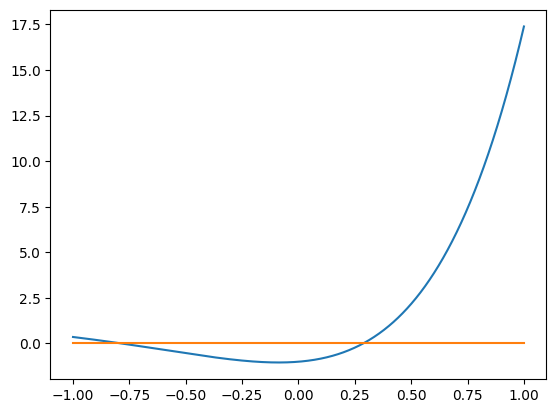

In [14]:
#Plot the funtions to see how there are two solutions to the equation
a = -1
b = 1
subdivisions = 1000

x = np.linspace(a,b,subdivisions)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([a,b],[0,0])

plt.show()

###a. Bisection on [-1,-0.5] and [0,0.5]

In [15]:
def bisection(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  if(b-a<2*error):
    return (a+b)/2
  if(f((a+b)/2)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
    return bisection(f,a,(a+b)/2,error)
  else:
    return bisection(f,(a+b)/2,b,error)
  return (a+b)/2

In [16]:
#in [-1,-0.5]
solution1 = bisection(f,-1,-0.5,10**-8)
print("x1 = ", solution1)

#in [0,0.5]
solution2 = bisection(f,0,0.5,10**-8)
print("x2 = ", solution2)

x1 =  -0.7843764200806618
x2 =  0.2867117151618004


###b. Regula falsi on [-1,-0.5] and [0,0.5]

In [17]:
def regulaFalsi(f,a,b,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  c = (a*f(b)-b*f(a))/(f(b)-f(a))
  if b-c<tolerance or c-a<tolerance:
    return c
  if f(a)*f(c)>0:
    return regulaFalsi(f,c,b,tolerance)
  else:
    return regulaFalsi(f,a,c,tolerance)

In [18]:
#in [-1,-0.5]
solution1 = regulaFalsi(f,-1,-0.5,10**-4)
print("x1 = ", solution1)

#in [0,0.5]
solution2 = regulaFalsi(f,0,0.5,10**-4)
print("x2 = ", solution2)

x1 =  -0.7843779749984261
x2 =  0.28668093312404447


###c. Newton-Ralphson with initial guesses x1 = -0.75 and x1 = 0.25

In [19]:
def derivative(f,x):
  h = 0.001
  return (f(x+h)-f(x))/h

In [20]:
def newtonRalphson(f,x,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    x: float
        approximate solution to the equation
  """
  while True:
    xnew = x - f(x)/derivative(f,x)
    if(math.fabs(x - xnew) < tolerance):
      x = xnew
      break
    x = xnew
  return x

In [21]:
#For an initial guess x1=-0.75
solution1 = newtonRalphson(f,-0.75,10**-4)
print("x1 = ", solution1)

#For an initial guess x1=0.25
solution2 = newtonRalphson(f,25,10**-4)
print("x2 = ", solution2)

x1 =  -0.7843764177451137
x2 =  0.2867117135633367


###d. Transforming the equation into fixed-point equations

In [22]:
#These two functions are the result of isolating x in the original function

#This one makes use of the property tan(arctan(x))=x
def g1(x):
  return np.tan(((x+1)**3*np.e**x-2)/3)

def g2(x):
  return (((3*np.arctan(x)+2)/(np.e**x))-x**3 - 3*x**2 -1)/3

In [23]:
def iteration(f,x,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    x: float
        approximate solution to the equation
  """
  xnew = f(x)
  while(abs(x-xnew)>tolerance):
    x = xnew
    xnew = f(x)
  return xnew

In [24]:
#For an initial guess x1=-1
solution1 = iteration(g1,-0.784,10**-4)
print("x1 = ", solution1)

#For an initial guess x1=0.25
solution2 = iteration(g2,0.25,10**-4)
print("x2 = ", solution2)

x1 =  -0.7843759086726302
x2 =  0.2867513577569179


##6.A cannon is located in space at the origin (0,0,0) and throws a ball that follow a parabolic trajectory (t,2t,5t-t^2), where t represents time in secondss (the ball is thrown at time t = 0). If the land is modeled by the surface z = 5 sin(x/5) sin(y/6),give the approximate point where the cannonball hits the land again.

In [25]:
def cannonBallPos(t):
  return [t,2*t,5*t-t**2]

def terrain(x,y):
  return 5*np.sin(x/5)*np.sin(y/6)

In [26]:
#Assuming the data is given in the following format: (x,y,z) and z is the height
#The z coordiante of the cannonball is described by the expression 5t-t**2, and
#the height of the terrain like so:= 5sin(x/5)sin(y/6).
#If we substitute x and y by the x and y coordinates of the cannonball trajectory
#(x = t and y = 2t), we get the following equation: 5t-t^2=5sin(t/5)sin(2t/6);
#which we can transform into: 5t-t^2-5sin(t/5)sin(2t/6) = 0. This will be our f(t)

#The solution of this problem will be given by the roots of this polynomial, to
#calculate them, I will use bisection with an error of 10^-8
def f(t):
  return 5*t-t**2-5*np.sin(t/5)*np.sin(2*t/6)

a=0
b=5
error = 10**-8
t = bisection(f,a,b,error)
print("The ball will hit the ground when t=",t)
impactCoordinates = cannonBallPos(t)
print("The approximate point of impact is:", impactCoordinates)

The ball will hit the ground when t= 4.126639189198613
The approximate point of impact is: [4.126639189198613, 8.253278378397226, 3.6040449481632777]


Side note: I was a bit curious of how the solution looked like, so I opened Wolfram Mathematica and plotted all the data, here's what I got:

<image src="https://i.imgur.com/FKsXO5t.png" width=45%>



The cannon is represented by the blue dot and the impact by the red one. The parabola that links them is the trajectory the cannonball follows.

The code used was:

```
Show[
  Graphics3D[{Red, PointSize[0.05],Point[{4.126639189198613, 8.253278378397226,3.6040449481632777}]}],
  Graphics3D[{Blue, PointSize[0.05], Point[{0, 0, 0}]}],
  Plot3D[5 Sin[x/5] Sin[y/6], {x, -10, 10}, {y, -10, 10}],
  ParametricPlot3D[{t, 2 t, 5 t - t^2}, {t, 0, 5}]
]
```


##7.We want to write a function that computes all real roots of a cubic equation p(x) = ax3 + bx2 + cx + d = 0 with a ̸= 0

In [27]:
def cubicEquation(b,c,d,x):
  #we assume that a = 1
  return x**3 + b*x**2 + c*x + d

In [28]:
def bisectionForCuadratic(f,left,right,error,b,c,d):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    left: float
        left limit of the interval
    right: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  if(right-left<2*error):
    return (left+right)/2
  if(f(b,c,d,(left+right)/2)*f(b,c,d,left)<0):
    return bisectionForCuadratic(f,left,(left+right)/2,error,b,c,d)
  else:
    return bisectionForCuadratic(f,(left+right)/2,right,error,b,c,d)
  return (left+right)/2

def maxOfThree(a,b,c):
  """
  Parameters
  ----------
    a: number
    b: number
    c: number

  Returns
  -------
    x: number
        the maximum number in {a,b,c}
  """
  if (a > b and a > c): return a
  elif (b > a and b > c): return b
  elif (c > a and c > b): return c

def quadratic(a,b,c):
  """
  Parameters
  ----------
    a: number
    b: number
    c: number

  Returns
  -------
    x1,x2: array
        the two solutions of the quadratic equation ax^2 + bx + c = 0
  """
  root = b**2-4*a*c
  if(root>=0):
    return (-b+np.sqrt(root))/(2*a), (-b-np.sqrt(root))/(2*a)
  return "Nan", "Nan"

def sortList(listIn):
  """
  Parameters
  ----------
    listIn: array
        list we want sorted

  Returns
  -------
    listIn: array
        ordered list
  """

  for i in range(1,len(listIn)):
    for j in range(i,len(listIn)):
      if listIn[j-1]>listIn[j]:
        aux = listIn[j-1];
        listIn[j-1] = listIn[j]
        listIn[j] = aux
  return listIn

In [29]:
b,c,d = -6,11,-6

error = 10**-8 # we will stimate the solutions with an error of 10^-8

#There is a result of Cauchy that all roots of p(x) = x^3 + bx^2 + cx + d lie in the interval [−M −1, M + 1], where M is the maximum of b, c and d.
M = maxOfThree(b,c,d)

#In between two zeros of p(x) there is a zero of the derivative p′(x) = 3x^2 + 2bx + c.
#The derivative is a quadratic equation, so it's zeros are given by the quadratic formula.
x1,x2 = quadratic(3,b,c)

if(x1 != "Nan"):
  maxima = sortList([-M-1,M+1,x1,x2])
  root1 = bisectionForCuadratic(cubicEquation,maxima[0],maxima[1],error,b,c,d)
  root2 = bisectionForCuadratic(cubicEquation,maxima[1],maxima[2],error,b,c,d)
  root3 = bisectionForCuadratic(cubicEquation,maxima[2],maxima[3],error,b,c,d)

  print("The solutions to the equation are: ")
  print("x1 =", root1)
  print("x2 =", root2)
  print("x3 =", root3)
else:
  maxima = sortList([-M-1,M+1])
  root = bisectionForCuadratic(cubicEquation,maxima[0],maxima[1],error,b,c,d)
  print("The solution to the equation is: ")
  print("x =", root)

The solution to the equation is: 
x = 5.9999999944120646


##8.Plot the function f(x)=(x*log(x))/(x^2+1) to check that it has an absolute minimum and an absolute maximum. Find them in two ways:

In [30]:
def f(x):
  return (x*np.log(x))/(x**2+1)

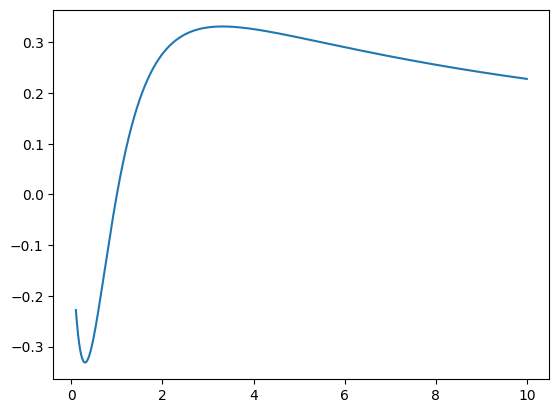

In [31]:
#Plot the funtion
a = 0.1
b = 10
subdivisions = 10000

x = np.linspace(a,b,subdivisions)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x,y)

plt.show()

###a.  By means of the trisection method within an error of 10^−7

In [32]:
def trisectionMinimum(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    x: float
        approximate position of the minimum
  """
  if(b-a)<2*error:
    return(a+b)/2 #Return the midpoint

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) < f(c2):
    return trisectionMinimum(f,a,c2,error)
  else:
    return trisectionMinimum(f,c1,b,error)

def trisectionMaximum(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    x: float
        approximate position of the maximum
  """
  if(b-a)<2*error:
    return(a+b)/2 #Return the midpoint

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) > f(c2):
    return trisectionMaximum(f,a,c2,error)
  else:
    return trisectionMaximum(f,c1,b,error)

In [33]:
error = 10**-7
print("The absolte minimum is in x=", trisectionMinimum(f,0.01,0.5,error))
print("The absolte maximum is in x=", trisectionMaximum(f,0.5,5,error))

The absolte minimum is in x= 0.30129102242987216
The absolte maximum is in x= 3.3190501229836533


###b. By gradient descent for suitable values of the parameter and the initial point

In [34]:
def derivative(f,x):
  h=0.001
  return (f(x+h)-f(x))/h

In [35]:
def gradientDescentMinimum(f,x,a,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    a: float
        parameter
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    xnew: float
        approximate position of the minimum
  """
  while True:
    xnew = x-a*derivative(f,x)
    if(abs(x-xnew) < tolerance):
      x=xnew
      break
    x=xnew
  return xnew

def gradientDescentMaximum(f,x,a,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    a: float
        parameter
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    xnew: float
        approximate position of the maximum
  """
  while True:
    xnew = x+a*derivative(f,x)
    if(abs(x-xnew) < tolerance):
      x=xnew
      break
    x=xnew
  return xnew

In [36]:
a = 0.025
tolerance = 10**-7

print("The absolte minimum is in x=", gradientDescentMinimum(f,0.05,a,tolerance))
print("The absolte maximum is in x=", gradientDescentMaximum(f,2,a,tolerance))

The absolte minimum is in x= 0.30079022771968134
The absolte maximum is in x= 3.318417365975583


##9.The function f(x, y) = x^3 + y^3 − 3xy + 3x − 3y has a local minimum. Find a better approximation to the exact value by the gradient descent method starting at the close point (0.4, 1.2) with an appropriate parameter. Stop when two consecutive approximations are at distance less than 10^−5

In [37]:
def f(x,y):
  return x**3 + y**3 - 3*x*y + 3*x - 3*y

def gradient(f,x,y):
  h=0.001
  px=(f(x+h,y)-f(x,y))/h
  py=(f(x,y+h)-f(x,y))/h
  return [px,py]

In [38]:
def gradientDescentMinimum2Variable(f,x,y,a,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess x
    y: float
        initial guess y
    a: float
        parameter
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    p: array
        approximate position of the minimum
  """
  while True:
    xnew = x-a*gradient(f,x,y)[0]
    ynew = y-a*gradient(f,x,y)[1]
    if (((x-xnew)**2+(y-ynew)**2)**(1/2)<tolerance):
      x = xnew
      y = ynew
      break
    x = xnew
    y = ynew
  return [x,y]

In [39]:
point = [0.4,1.2]
a = 0.22
tolerance = 10**-5

print("The approximate position of the minimum is: ", gradientDescentMinimum2Variable(f,point[0],point[1],a,tolerance))

The approximate position of the minimum is:  [0.4514530732793617, 1.2042674000949372]


#**Interpolation and approximation**

##10. We have a program that reads the entries of a database and looks for consistence errors. The program takes 8 hours to complete the task. However, after three hours running, we decide to check how many inconsistencies have been found. To this end, we keep track of the number of inconsistencies every half an hour:<br>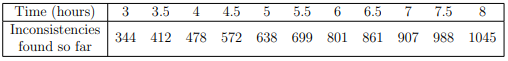<br>We would like to estimate how many inconsistencies were found during the first hour (too bad we didn’t start our statistics earlier!). Give the approximate solution to this question by each of the following methods:

In [80]:
time = [3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8]
issues= [344,412,478,572,638,699,801,861,907,988,1045]

###a)by the interpolating polynomial

In [50]:
def dividedDifferencesForNewton(x,y):
  '''
  Parameters
  ----------
    x:float array
        x coordinates of the points
    y:float array
        y coordinates of the points
  Returns
  -------
    L: matrix
        first elements of each row of the table of divided differences
  '''
  L=[y]
  n = len(x) #n: number of points (x,y)

  #computing the matrix that contains the table
  for i in range(1,n):
    row = []
    for j in range(n-i):
      row.append((L[i-1][j]-L[i-1][j+1])/(x[j]-x[j+i]))
    L.append(row)

  return [row[0] for row in L]

#Newton's interpolation is quicker than Lagrange's Interpolation, although the result is the same
#Another benefict of this approach is that we can add new elements, the only new computation we have to do is add a new diagonal to the divided differences
def newtonInterpolation(t,x,y):
  '''
  Parameters
  ----------
    t: float
        variable
    x:float array
        x coordinates of the points
    y:float array
        y coordinates of the points
  Returns
  -------
    result: float
      p(t)
  '''
  dd = dividedDifferencesForNewton(x,y)
  n = len(x)

  #these two lines are the first summand of p(t)
  result = dd[0]
  product = 1 #product of factors


  for i in range(1,n): #n iterarions
    product *= t-x[i-1]
    result += dd[i]*product
  return result

1445249.0


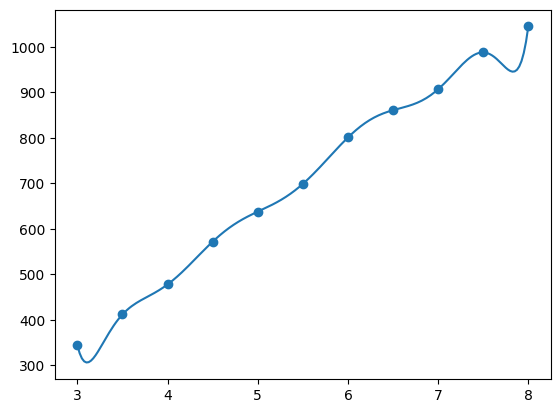

In [81]:
t = 1

def p(t):
  return newtonInterpolation(t,time,issues);

print(p(t))

t=np.linspace(time[0],time[len(time)-1],200)
fig, ax = plt.subplots()
ax.scatter(time,issues)
ax.plot(t,p(t))

plt.show()

##11. We have developed a certain software with long-time support. After counting every month how many new issues have been reported by testers and users, we found the following data:<br>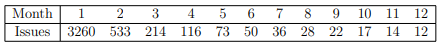<br>The project manager has decided to discontinue the support when the reported issues per month become less than 5. However, the manager must tell the company when the disconuation will occur in order to estimate expenses. We will help the manager by creating a model that aproximates the above values in the sense of least-squares by a function of the form f(t) = a1/t + a2/t^2 + a3/t^3 + a4/t^4.


In [82]:
month=[1,2,3,4,5,6,7,8,9,10,11,12]
issues=[3260,533,214,116,73,50,36,28,22,17,14,12]

###a)Plot the set of points together with the best approximation in the above sense.

##12.We would like to approximate the function f(x) = e^(−x/2)*(2 sin(x) + 1) in the interval [−3, 3] by means of a spline curve. To this end, we consider the partition of [−3, 3] in four subintervals of width 1.5. Plot some axes where you represent the following items together:


###a) the graph of f(x) on the domain [−3, 3],


In [225]:
def f(x):
  return (np.e**(-x/2))*(2*np.sin(x)+1)

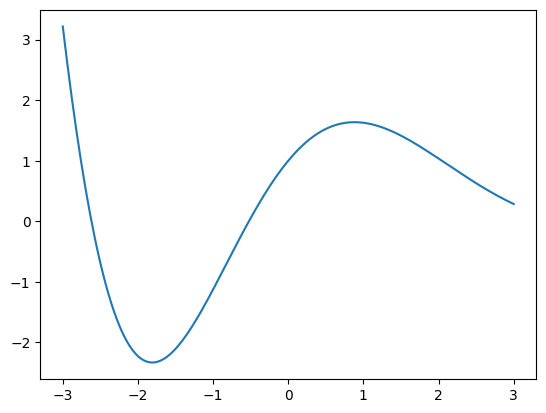

In [227]:
fig, ax = plt.subplots()

x = np.linspace(-3,3,200)
ax.plot(x,f(x))

plt.show()

###b) a cubic Hermite spline that interpolates f(x) on the points of the partition.

In [84]:
def dividedDifferencesForHermite(list):
  '''
  Parameters
  ----------
    list: float array
        this list stores all the vectors that define the points with this format:
         [(x0,y0,y'0,y''0,...),(x1,y1,y'1,y''1,...),...]

  Returns
  -------
    L: matrix
        first elements of each row of the table of divided differences
  '''
  L = []
  points = []
  pointer = []
  row = []
  n = 0

  for i in range(len(list)):
    n = n + len(list[i]) - 1
    for j in range(1,len(list[i])):
      points.append(list[i][0])
      pointer.append(i)
      row.append(list[i][1])
  L.append(row)

  for i in range(1,n):
    row = []
    for j in range(n-i):
      if (points[j] != points[j+i]):
        row.append((L[i-1][j]-L[i-1][j+1])/(points[j]-points[j+i]))
      else:
        row.append(list[pointer[j]][i+1]/math.factorial(i))
    L.append(row)

  return [row[0] for row in L]

def hermiteInterpolation(t,list):
  '''
  Parameters
  ----------
    t: float
        variable
    list: float array
        this list stores all the vectors that define the points with this format:
         [(x0,y0,y'0,y''0,...),(x1,y1,y'1,y''1,...),...]
  Returns
  -------
    result: float
      p(t)
  '''
  dd = dividedDifferencesForHermite(list)
  points = [] #this vector contains all the points

  for i in range(len(list)):
    for j in range(1,len(list[i])):
      points.append(list[i][0])

  #these two lines are the first summand of p(t)
  result = dd[0]
  product = 1 #product of factors

  for i in range(1,len(points)): #n iterarions
    product *= t-points[i-1]
    result += dd[i]*product
  return result

In [228]:
def secondDerivative(f,x):
  '''
  Parameters
  ----------
    f: function
    x: float
        point of evaluation
  Returns
  -------
    f'(x): float
      second derivative of f in x
  '''
  h = 0.0001
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

In [229]:
def pointData(f,x):
  '''

  Generalization for the data I have to give for a spline approximation

  Parameters
  ----------
    f: function
    x: float
        point of evaluation

  Returns
  -------
    data: array
      array with the data of the point in the format:
       [x,f(x),f'(x),f''(x)]
  '''
  return [x,f(x),derivative(f,x),secondDerivative(f,x)]

In [230]:
x = np.linspace(-3,3)
divisions = [-3,-1.5,0,1.5,3]

def spline(x):
  if x >= divisions[0] and x <= divisions[1]:
    return hermiteInterpolation(x,[
                                pointData(f,divisions[0]),
                                pointData(f,divisions[1])])
  elif x >= divisions[1] and x <= divisions[2]:
    return hermiteInterpolation(x,[
                                pointData(f,divisions[1]),
                                pointData(f,divisions[2])])
  elif x >= divisions[2] and x <= divisions[3]:
    return hermiteInterpolation(x,[
                                pointData(f,divisions[2]),
                                pointData(f,divisions[3])])
  elif x >= divisions[3] and x <= divisions[4]:
    return hermiteInterpolation(x,[
                                pointData(f,divisions[3]),
                                pointData(f,divisions[4])])
  elif x >= divisions[4] and x <= divisions[5]:
    return hermiteInterpolation(x,[
                                pointData(f,divisions[3]),
                                pointData(f,divisions[4])])

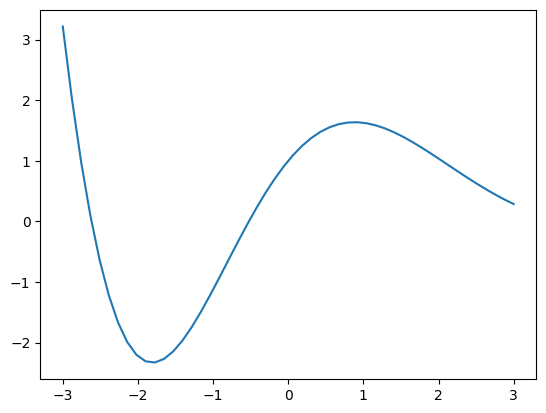

In [232]:
splineImage = [spline(s) for s in x]

fig, ax = plt.subplots()

ax.plot(x,splineImage)

plt.show()

###Both plotted at the same time:

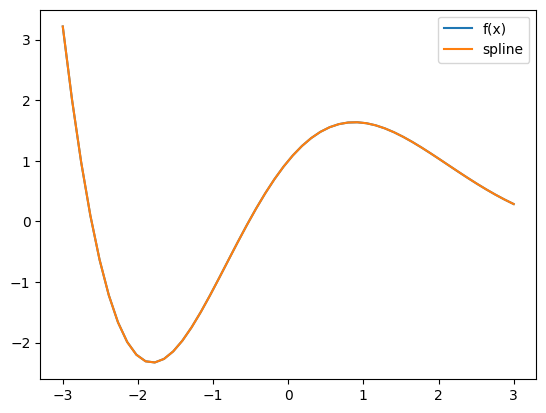

In [231]:
splineImage = [spline(s) for s in x]

fig, ax = plt.subplots()


ax.plot(x,f(x), label="f(x)")
ax.plot(x,splineImage, label="spline")

ax.legend()

plt.show()

##13.We would like to obtain a curve that resembles a circle by means of a cubic Hermite spline (Bezier curve). To this end, consider the following points pi and speeds vi for some a > 0:<br>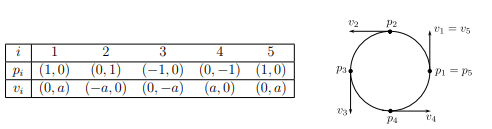<br>Plot some axes where you represent the following items together:

###a) the unit circle parametrized by (x, y) = (cos(t),sin(t)), t ∈ [0, 2π]

In [111]:
def f(t):
  return np.sin(t)+np.cos(t)

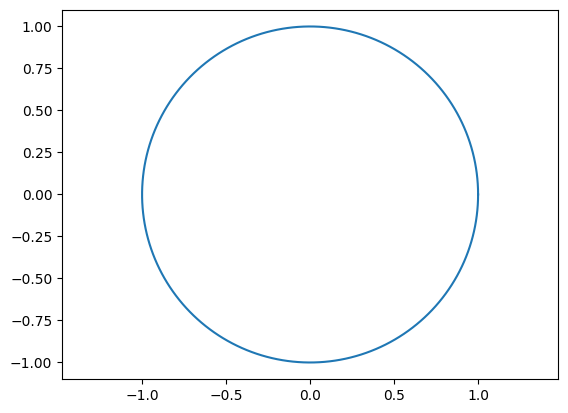

In [110]:
r = np.linspace(0,2*np.pi,200)

fig, ax = plt.subplots()
ax.plot(np.cos(r), np.sin(r))

plt.axis('equal') #This forces the aspect ratio to be 1:1
plt.show()

###b) a double cubic Hermite spline that interpolates the above data.

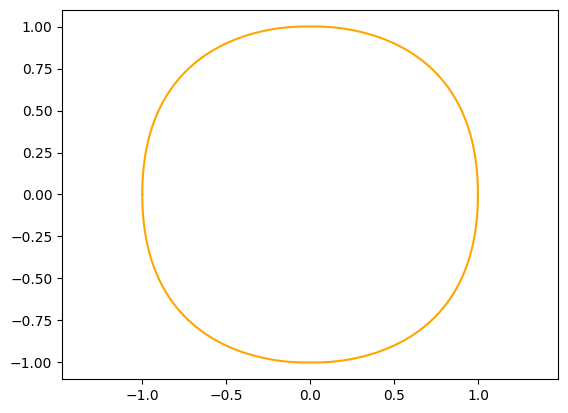

In [222]:
a = 3.2 #a is a variable parameter that has to be fine-tuned to get a good enough result

def circunferenceX(t):
  if t<=0:
    return hermiteInterpolation(t,[[-1,-1,0],[0,0,0]])
  elif t>0:
    return hermiteInterpolation(t,[[0,0,0],[1,1,0]])

def lowerHemisphereY(t,a):
  if t<=0:
    return hermiteInterpolation(t,[[-1,0,-a],[0,-1,0]])
  elif t>0:
    return hermiteInterpolation(t,[[0,-1,0],[1,0,a]])

def upperHemisphereY(t,a):
  if t <= 0:
    return hermiteInterpolation(t,[[-1,0,a],[0,1,0]])
  elif t > 0:
    return hermiteInterpolation(t,[[0,1,0],[1,0,-a]])

fig, ax = plt.subplots()

t = np.linspace(-1,1,200)
#plot lower hemisphere
x = [circunferenceX(s) for s in t]
yUp = [lowerHemisphereY(s,a) for s in t]
ax.plot(x,yUp,color="orange")

#plot upper hemisphere
yDown = [upperHemisphereY(s,a) for s in t]
ax.plot(x,yDown,color="orange")

plt.axis('equal') #This forces the aspect ratio to be 1:1
plt.show()


###Both plotted

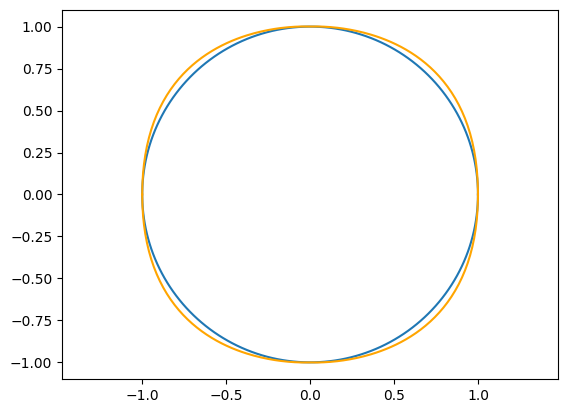

In [223]:
fig, ax = plt.subplots()

r = np.linspace(0,2*np.pi,200)
ax.plot(np.cos(r), np.sin(r))

#approximated circle
a = 3.2
t = np.linspace(-1,1,200)
#plot lower hemisphere
x = [circunferenceX(s) for s in t]
yUp = [lowerHemisphereY(s,a) for s in t]
ax.plot(x,yUp,color="orange")

#plot upper hemisphere
yDown = [upperHemisphereY(s,a) for s in t]
ax.plot(x,yDown,color="orange")

plt.axis('equal') #This forces the aspect ratio to be 1:1
plt.show()